# Dados de Entrada
* Selecione "Adicionar ao Drive" - No Google Drive - Organizar e criar atalho na pasta correta
* Links:
  * https://tinyurl.com/bigdata-gut-pt
  * https://tinyurl.com/bigdata-amz
  * https://tinyurl.com/bd-votos



  




## Acesso ao Drive

In [1]:
#Não instalar libs do google colab localmente
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/amz'

meta_small.json		  meta_Toys_and_Games.parquet  small.json	   Toys_and_Games.json
meta_Toys_and_Games.json  small.csv		       Toys_and_Games.csv  Toys_and_Games.parquet


In [3]:
!ls '/content/drive/My Drive/gut-pt'

all  small


# Setup

## Instalação de pacotes

In [4]:
!apt-get update  > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #kit de desenvolvimento Java
!wget -q https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install findspark pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=927956da4f48d9d374b984ea65c907986695d4abd2207b28d27a0a558cf646dd
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [5]:
!ls

drive  sample_data  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz


## Preparação do ambiente

In [8]:
%env PYTHONHASHSEED=1234
%env JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64
%env SPARK_HOME=/content/spark-3.5.1-bin-hadoop3

env: PYTHONHASHSEED=1234
env: JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64
env: SPARK_HOME=/content/spark-3.5.1-bin-hadoop3


In [9]:
!ls $SPARK_HOME

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [10]:
import findspark
findspark.init("/content/spark-3.5.1-bin-hadoop3")

In [12]:
from pyspark.sql import SparkSession

appName = 'Big Data'
master = 'local[*]'

spark = SparkSession.builder     \
    .master(master) \
    .appName(appName) \
    .getOrCreate()

spark.sparkContext.setLogLevel("WARN")

## Criação de RDD

In [13]:
data = [1, 2, 3, 4, 5]
distributed_data = spark.sparkContext.parallelize(data)

In [15]:
data

[1, 2, 3, 4, 5]

In [14]:
distributed_data

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [16]:
#Duas partições porque o Colab fornece 2 cores
distributed_data.getNumPartitions()

2

# Exemplo Básico: contagem de palavras

## Leitura dos dados e operações com RDD

In [17]:
input_data = spark.sparkContext.textFile('/content/drive/My Drive/gut-pt/small/*')


In [18]:
input_data

/content/drive/My Drive/gut-pt/small/* MapPartitionsRDD[2] at textFile at NativeMethodAccessorImpl.java:0

In [19]:
few_lines = input_data.take(10)


In [20]:
print(few_lines)


['The Project Gutenberg EBook of Noites de insomnia, offerecidas a quem não', 'póde dormir. Nº6 (de 12), by Camilo Castelo Branco', '', 'This eBook is for the use of anyone anywhere at no cost and with', 'almost no restrictions whatsoever.  You may copy it, give it away or', 're-use it under the terms of the Project Gutenberg License included', 'with this eBook or online at www.gutenberg.org', '', '', 'Title: Noites de insomnia, offerecidas a quem não póde dormir. Nº6 (de 12)']


In [21]:
print(few_lines)
for l in few_lines :
  print(l)

['The Project Gutenberg EBook of Noites de insomnia, offerecidas a quem não', 'póde dormir. Nº6 (de 12), by Camilo Castelo Branco', '', 'This eBook is for the use of anyone anywhere at no cost and with', 'almost no restrictions whatsoever.  You may copy it, give it away or', 're-use it under the terms of the Project Gutenberg License included', 'with this eBook or online at www.gutenberg.org', '', '', 'Title: Noites de insomnia, offerecidas a quem não póde dormir. Nº6 (de 12)']
The Project Gutenberg EBook of Noites de insomnia, offerecidas a quem não
póde dormir. Nº6 (de 12), by Camilo Castelo Branco

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Noites de insomnia, offerecidas a quem não póde dormir. Nº6 (de 12)


In [22]:
# Cuidado! Pode ser muito grande!
#all_lines = input_data.collect()
#for l in all_lines :
#  print(l)

cnt = input_data.count()

print("Total de linhas:",cnt)

Total de linhas: 29934


In [23]:
#são 5 arquivos, tem 1 partição para cada arquivo
input_data.getNumPartitions()

5

## Separação de palavras (map)

In [24]:
input_data.take(10)

['The Project Gutenberg EBook of Noites de insomnia, offerecidas a quem não',
 'póde dormir. Nº6 (de 12), by Camilo Castelo Branco',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: Noites de insomnia, offerecidas a quem não póde dormir. Nº6 (de 12)']

In [25]:
input_data.count()

29934

In [26]:
# Modifique o template para processar as palavras de cada linha
# Cria um contador 1 para cada palavra
def process_line(line) :
  for word in line.split() :
    yield (word, 1) # 

In [27]:
#flatMap - para cada linha chama a função
#map tem uma e só uma saída, flatmap pode ter mais do que uma saída, ou nenhuma
words = input_data.flatMap(process_line); # aqui ainda não carregou na memória (lazy evaluation)

In [ ]:
# Comportamento do map

#for line in input_data :
#  process_line(line)

In [28]:
words.take(100) #aqui carregou em memória

[('The', 1),
 ('Project', 1),
 ('Gutenberg', 1),
 ('EBook', 1),
 ('of', 1),
 ('Noites', 1),
 ('de', 1),
 ('insomnia,', 1),
 ('offerecidas', 1),
 ('a', 1),
 ('quem', 1),
 ('não', 1),
 ('póde', 1),
 ('dormir.', 1),
 ('Nº6', 1),
 ('(de', 1),
 ('12),', 1),
 ('by', 1),
 ('Camilo', 1),
 ('Castelo', 1),
 ('Branco', 1),
 ('This', 1),
 ('eBook', 1),
 ('is', 1),
 ('for', 1),
 ('the', 1),
 ('use', 1),
 ('of', 1),
 ('anyone', 1),
 ('anywhere', 1),
 ('at', 1),
 ('no', 1),
 ('cost', 1),
 ('and', 1),
 ('with', 1),
 ('almost', 1),
 ('no', 1),
 ('restrictions', 1),
 ('whatsoever.', 1),
 ('You', 1),
 ('may', 1),
 ('copy', 1),
 ('it,', 1),
 ('give', 1),
 ('it', 1),
 ('away', 1),
 ('or', 1),
 ('re-use', 1),
 ('it', 1),
 ('under', 1),
 ('the', 1),
 ('terms', 1),
 ('of', 1),
 ('the', 1),
 ('Project', 1),
 ('Gutenberg', 1),
 ('License', 1),
 ('included', 1),
 ('with', 1),
 ('this', 1),
 ('eBook', 1),
 ('or', 1),
 ('online', 1),
 ('at', 1),
 ('www.gutenberg.org', 1),
 ('Title:', 1),
 ('Noites', 1),
 ('de', 1)

In [29]:
words.count()

230603

**Pare aqui!**

Implemente a sua solução antes de continuar

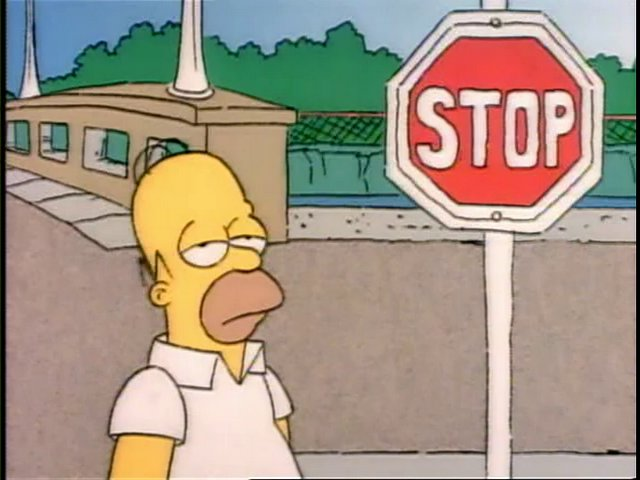

## Separação de palavras (versão inicial)

In [30]:
# Modifique o template para processar as palavras de cada linha
def process_line(line) :
  words = line.split()
  for word in words :
    yield (word, 1)

In [ ]:
words = input_data.flatMap(process_line);

In [ ]:
words.take(100)

## Separação de palavras (pontuação, ineficiente)

In [31]:
#cada caractere é uma interação do for, é ineficiente
#geralmente usa-se regex, que é um padrão de substituição
def process_line(line) :
  line = line.lower()
  for char in '`~º!@#$%^&*()_-+=/*-,./<>?;:\'\"[]{}|0123456789\'\"' :
    line = line.replace(char, ' ')
  words = line.split()
  for word in words :
    yield (word, 1)

In [32]:
words = input_data.flatMap(process_line);

In [33]:
words.take(100)

[('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('ebook', 1),
 ('of', 1),
 ('noites', 1),
 ('de', 1),
 ('insomnia', 1),
 ('offerecidas', 1),
 ('a', 1),
 ('quem', 1),
 ('não', 1),
 ('póde', 1),
 ('dormir', 1),
 ('n', 1),
 ('de', 1),
 ('by', 1),
 ('camilo', 1),
 ('castelo', 1),
 ('branco', 1),
 ('this', 1),
 ('ebook', 1),
 ('is', 1),
 ('for', 1),
 ('the', 1),
 ('use', 1),
 ('of', 1),
 ('anyone', 1),
 ('anywhere', 1),
 ('at', 1),
 ('no', 1),
 ('cost', 1),
 ('and', 1),
 ('with', 1),
 ('almost', 1),
 ('no', 1),
 ('restrictions', 1),
 ('whatsoever', 1),
 ('you', 1),
 ('may', 1),
 ('copy', 1),
 ('it', 1),
 ('give', 1),
 ('it', 1),
 ('away', 1),
 ('or', 1),
 ('re', 1),
 ('use', 1),
 ('it', 1),
 ('under', 1),
 ('the', 1),
 ('terms', 1),
 ('of', 1),
 ('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('license', 1),
 ('included', 1),
 ('with', 1),
 ('this', 1),
 ('ebook', 1),
 ('or', 1),
 ('online', 1),
 ('at', 1),
 ('www', 1),
 ('gutenberg', 1),
 ('org', 1),
 ('title', 1),
 ('noites', 1),
 ('de

## Separação de palavras (expressão regular)

In [34]:
import re

def process_line(line) :
  line = re.sub('[^a-zà-ù ]', ' ', line.lower())
  words = line.split()
  for word in words :
    yield (word, 1)

In [35]:
words = input_data.flatMap(process_line);

In [ ]:
# Comportamento

#for line in input_data :
#  process_line(line)

In [36]:
words.take(1000)

[('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('ebook', 1),
 ('of', 1),
 ('noites', 1),
 ('de', 1),
 ('insomnia', 1),
 ('offerecidas', 1),
 ('a', 1),
 ('quem', 1),
 ('não', 1),
 ('póde', 1),
 ('dormir', 1),
 ('n', 1),
 ('de', 1),
 ('by', 1),
 ('camilo', 1),
 ('castelo', 1),
 ('branco', 1),
 ('this', 1),
 ('ebook', 1),
 ('is', 1),
 ('for', 1),
 ('the', 1),
 ('use', 1),
 ('of', 1),
 ('anyone', 1),
 ('anywhere', 1),
 ('at', 1),
 ('no', 1),
 ('cost', 1),
 ('and', 1),
 ('with', 1),
 ('almost', 1),
 ('no', 1),
 ('restrictions', 1),
 ('whatsoever', 1),
 ('you', 1),
 ('may', 1),
 ('copy', 1),
 ('it', 1),
 ('give', 1),
 ('it', 1),
 ('away', 1),
 ('or', 1),
 ('re', 1),
 ('use', 1),
 ('it', 1),
 ('under', 1),
 ('the', 1),
 ('terms', 1),
 ('of', 1),
 ('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('license', 1),
 ('included', 1),
 ('with', 1),
 ('this', 1),
 ('ebook', 1),
 ('or', 1),
 ('online', 1),
 ('at', 1),
 ('www', 1),
 ('gutenberg', 1),
 ('org', 1),
 ('title', 1),
 ('noites', 1),
 ('de

In [37]:
words.count()

237650

In [38]:
words.getNumPartitions()

5

## Contagem (Reduce)

In [39]:
def accumulate(acc, v) :
  return acc + v

In [ ]:
# Comportamento interno (para uma chave) - no sistema de Runtime (Spark)
# aqui a acumulação é feita em paralelo por chaves, uma partição fica com bananas, 
# outra com maçãs e cada participação contabiliza sua respectiva fruta separadamente
# isso é uma "árvore de redução"

#reduceByKey(values, f):
#  acc = 0
#  for v in values :
#    acc = f(acc, v)
#     -> acc = acc + v

In [ ]:
# Árvore de redução
# Partição 1                          Partição 2
# [1 1 1 1]                           [1 1]
# [4]                                 [2]
# [4 2]
# [6]

In [40]:
wc = words.reduceByKey(accumulate)

In [ ]:
wc.take(100)

In [42]:
wc.collect()

[('project', 437),
 ('ebook', 55),
 ('de', 7377),
 ('quem', 222),
 ('n', 278),
 ('camilo', 3),
 ('branco', 23),
 ('restrictions', 10),
 ('may', 75),
 ('org', 61),
 ('date', 15),
 ('start', 15),
 ('produced', 19),
 ('scanned', 4),
 ('images', 6),
 ('google', 4),
 ('algibeira', 14),
 ('junho', 7),
 ('francisco', 18),
 ('silva', 7),
 ('cancella', 3),
 ('velha', 54),
 ('para', 1725),
 ('historia', 55),
 ('brasileiros', 3),
 ('joaquim', 29),
 ('á', 1161),
 ('conselheiro', 13),
 ('viale', 4),
 ('malandrim', 2),
 ('escrever', 29),
 ('est', 13),
 ('outro', 389),
 ('negocio', 59),
 ('vida', 281),
 ('estes', 61),
 ('um', 3013),
 ('que', 7742),
 ('real', 33),
 ('afamado', 2),
 ('todo', 119),
 ('alfaiates', 1),
 ('paço', 8),
 ('fez', 144),
 ('acabou', 39),
 ('como', 922),
 ('ou', 805),
 ('illustres', 5),
 ('melhor', 163),
 ('sabia', 67),
 ('as', 1814),
 ('curiosidade', 19),
 ('achará', 4),
 ('repartido', 4),
 ('juros', 5),
 ('tenças', 1),
 ('seu', 253),
 ('afortunados', 1),
 ('lastima', 4),
 ('elc

In [43]:
wc.count()

22503

In [44]:
wc.getNumPartitions()

5

## Contagem usando funções lambda

In [45]:
input_data.take(10)

['The Project Gutenberg EBook of Noites de insomnia, offerecidas a quem não',
 'póde dormir. Nº6 (de 12), by Camilo Castelo Branco',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: Noites de insomnia, offerecidas a quem não póde dormir. Nº6 (de 12)']

In [46]:
clean_lines = input_data.map(lambda line: re.sub('[^a-zà-ù ]', '', line.lower()))

In [47]:
clean_lines.take(10)

['the project gutenberg ebook of noites de insomnia offerecidas a quem não',
 'póde dormir n de  by camilo castelo branco',
 '',
 'this ebook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever  you may copy it give it away or',
 'reuse it under the terms of the project gutenberg license included',
 'with this ebook or online at wwwgutenbergorg',
 '',
 '',
 'title noites de insomnia offerecidas a quem não póde dormir n de ']

In [48]:
words = clean_lines.flatMap(lambda line: line.split())

In [49]:
words.take(10)

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'noites',
 'de',
 'insomnia',
 'offerecidas',
 'a']

In [50]:
counts = words.map(lambda word: (word, 1))

In [51]:
counts.take(10)

[('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('ebook', 1),
 ('of', 1),
 ('noites', 1),
 ('de', 1),
 ('insomnia', 1),
 ('offerecidas', 1),
 ('a', 1)]

In [52]:
wc = counts.reduceByKey(lambda acc, v: acc + v)

In [53]:
wc.take(10)

[('project', 437),
 ('ebook', 55),
 ('de', 7366),
 ('quem', 218),
 ('n', 21),
 ('camilo', 3),
 ('branco', 22),
 ('restrictions', 10),
 ('may', 75),
 ('reuse', 10)]

In [54]:
wc = input_data.map(lambda line: re.sub('[^a-zà-ù ]', ' ', line.lower()))  \
    .flatMap(lambda line: line.split())  \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda acc, v: acc + v) #reduce acumula os contadores para cada classe

In [55]:
wc.take(10)

[('project', 437),
 ('ebook', 55),
 ('de', 7377),
 ('quem', 222),
 ('n', 278),
 ('camilo', 3),
 ('branco', 23),
 ('restrictions', 10),
 ('may', 75),
 ('org', 61)]

# Calculo de Média

In [56]:
input_data = spark.sparkContext.textFile('/content/drive/My Drive/amz/small.csv')


In [57]:
!ls '/content/drive/My Drive/amz/small.csv'

'/content/drive/My Drive/amz/small.csv'


In [58]:
!head '/content/drive/My Drive/amz/small.csv'

0020232233,A1IDMI31WEANAF,2.0,1474502400
0020232233,A4BCEVVZ4Y3V3,1.0,1474156800
0020232233,A2EZ9PY1IHHBX0,3.0,1473638400
0020232233,A139PXTTC2LGHZ,5.0,1488412800
0020232233,A3IB33V29XIL8O,1.0,1486512000
0020232233,A1J86V48S4KRJE,5.0,1485475200
0020232233,A14J12PRBLGHF4,5.0,1483315200
0020232233,A2UKOWP9ICU416,5.0,1481932800
0020232233,A2ONKKDETRWT79,4.0,1481760000
0020232233,AK9GN9KZZNTEP,3.0,1481241600


In [72]:
def prod_nota(linha) :
  campos = linha.split(',')
  prod = campos[0]
  avaliacao = float(campos[2])
  return (prod, (avaliacao,1))




In [73]:
avaliacoes = input_data.map(prod_nota)

In [74]:
avaliacoes.take(10)

[('0020232233', (2.0, 1)),
 ('0020232233', (1.0, 1)),
 ('0020232233', (3.0, 1)),
 ('0020232233', (5.0, 1)),
 ('0020232233', (1.0, 1)),
 ('0020232233', (5.0, 1)),
 ('0020232233', (5.0, 1)),
 ('0020232233', (5.0, 1)),
 ('0020232233', (4.0, 1)),
 ('0020232233', (3.0, 1))]

In [78]:
def media(acc, v) :
  acc_v = acc[0]
  acc_n = acc[1]
  v_v = v[0] # o que eu já tinha acumulado antes
  v_n = v[1] # o que vou acumular agora
  ret_v = acc_v + v_v
  ret_n = acc_n + v_n
  
  return (ret_v, ret_n)

In [79]:
m = avaliacoes.reduceByKey(media)

In [84]:
m.take(10)

[('0020232233', (49.0, 13)),
 ('038536539X', (9.0, 3)),
 ('0486402029', (18.0, 6)),
 ('0486427706', (144.0, 30)),
 ('0486448789', (346.0, 87)),
 ('0545561647', (767.0, 193)),
 ('0641869665', (136.0, 32)),
 ('0735331146', (83.0, 17)),
 ('0769658237', (19.0, 4)),
 ('0769663192', (25.0, 6))]

In [86]:
def reduce_acumula(acc, v) :
  acc_soma = acc[0]
  acc_cont = acc[1]
  v_soma = v[0]
  v_cont = v[1]
  soma = acc_soma + v_soma
  cont = acc_cont + v_cont
  return (soma, cont)


In [87]:
total = avaliacoes.reduceByKey(reduce_acumula)

In [88]:
total.take(10)

[('0020232233', (49.0, 13)),
 ('038536539X', (9.0, 3)),
 ('0486402029', (18.0, 6)),
 ('0486427706', (144.0, 30)),
 ('0486448789', (346.0, 87)),
 ('0545561647', (767.0, 193)),
 ('0641869665', (136.0, 32)),
 ('0735331146', (83.0, 17)),
 ('0769658237', (19.0, 4)),
 ('0769663192', (25.0, 6))]

In [89]:
def calcula_media(v) :
  return round(v[0] / v[1], 2)

In [90]:
medias = total.mapValues(calcula_media)

In [91]:
medias.take(10)

[('0020232233', 3.77),
 ('038536539X', 3.0),
 ('0486402029', 3.0),
 ('0486427706', 4.8),
 ('0486448789', 3.98),
 ('0545561647', 3.97),
 ('0641869665', 4.25),
 ('0735331146', 4.88),
 ('0769658237', 4.75),
 ('0769663192', 4.17)]

In [ ]:
input_data.take(10)

In [ ]:
def separar_avaliacoes(linha) :
  prod, usuario, nota, data = linha.split(',')
  nota = float(nota)
  return (prod, (nota,1))

In [ ]:
campos = input_data.map(separar_avaliacoes)

In [ ]:
campos.take(10)

In [ ]:
def acc(v1, v2) :
  nota_review = v1[0] + v2[0]
  contagem = v1[1] + v2[1]
  return (nota_review, contagem)

In [ ]:
total = campos.reduceByKey(acc)

In [ ]:
total.take(10)

In [ ]:
def cal_media(valor) :
  soma = valor[0]
  contagem = valor[1]
  return round(soma/contagem,2)

In [ ]:
media = total.mapValues(cal_media)

In [ ]:
media.take(10)

In [ ]:
def proc_line(line) :
  fields = line.split(',')
  prod = fields[0]
  eval = float(fields[2])
  return (prod, (eval,1))

In [ ]:
revs = input_data.map(proc_line)

In [ ]:
revs.take(10)

In [ ]:
def average_calc(acc, v) :
  return (acc[0]+v[0], acc[1]+v[1])

In [ ]:
input_data.take(10)

In [ ]:
reviews = input_data.map(lambda line: line.split(','))

In [ ]:
reviews.take(10)

In [ ]:
prod_reviews = reviews.map(lambda line: (line[0], (float(line[2]), 1)))

In [ ]:
prod_reviews.take(10)

In [ ]:
acc = prod_reviews.reduceByKey(lambda acc,v: (acc[0]+v[0], acc[1]+v[1]))

In [ ]:
acc.take(10)

In [ ]:
def calc_average(values) :
  sum_evals = values[0]
  n_evals = values[1]
  return round(sum_evals/n_evals,2)

In [ ]:
avg = acc.mapValues(lambda r: round(r[0]/r[1],1))

In [ ]:
avg.take(10)

In [ ]:
avg = input_data.map(lambda line: line.split(',')) \
        .map(lambda line: (line[0], (float(line[2]), 1))) \
        .reduceByKey(lambda a,b: (a[0]+b[0], a[1]+b[1])) \
        .mapValues(lambda r: round(r[0]/r[1],2))

In [ ]:
avg.take(10)

## Ordenação por chave e valor

In [ ]:
avg.getNumPartitions()

In [ ]:
# Ordenar RDD por chave (primeiro elemento de cada linha)

sorted_prod = avg.sortBy(lambda line: line[0])


In [ ]:
sorted_prod.take(5)

In [ ]:
#Ordenar cada item do RDD pelo segundo elemento de cada (line[1])

sorted_avg = avg.sortBy(lambda line: line[1])


In [ ]:
sorted_avg.take(10)

In [ ]:
sorted_rev = avg.sortBy(lambda line: line[1], ascending=False)

In [ ]:
sorted_rev.take(10)

In [ ]:
avg.takeOrdered(10, key=lambda line: -line[1])

In [ ]:
avg.takeOrdered(10, key=lambda line: line[1])

# Separação por arquivos

In [ ]:
input_dir = 'file:/content/drive/My Drive/gut-pt/small/'

In [ ]:
input_files = spark.sparkContext.wholeTextFiles(input_dir+"*")


In [ ]:
input_files.take(2)

In [ ]:
def process_file(f) :
  filename = f[0]
  text = f[1]
  filename = re.sub(input_dir, '', filename)
  text = re.sub('\*End of .*Project Gutenberg.*', '', text, flags=re.IGNORECASE|re.DOTALL)
  text = re.sub('[^a-zà-ù ]', ' ', text.lower())
  words = text.split()
  for w in words :
    yield ((filename, w), 1)

In [ ]:
word_pairs = input_files.flatMap(process_file)

In [ ]:
word_pairs.take(10)

In [ ]:
wc = word_pairs.reduceByKey(lambda acc, v: acc + v)

In [ ]:
wc.take(10)

In [ ]:
sorted_wc = wc.sortBy(lambda item: item[1],ascending=False)

In [ ]:
sorted_wc.take(10)

In [ ]:
def contagem_total(item) :
  chave = item[0]
  contagem = item[1]
  nome_do_arquivo = chave[0]
  palavra = chave[1]
  return (palavra, contagem)

In [ ]:
contagem_sem_arquivos = sorted_wc.map(contagem_total)

In [ ]:
contagem_sem_arquivos.take(10)

In [ ]:
total_geral = contagem_sem_arquivos.reduceByKey(lambda acc, v: acc+v)

In [ ]:
total_geral.take(10)

In [ ]:
total_wc = wc.map(lambda item: (item[0][1], item[1])) \
            .reduceByKey(lambda acc, v: acc + v) \
            .sortBy(lambda item: item[1],ascending=False)

In [ ]:
total_wc.take(10)

In [ ]:
total_wc.count()

In [ ]:
!rm -rf total_wc

In [ ]:
total_wc.saveAsTextFile("total_wc")

In [ ]:
!ls total_wc

In [ ]:
!head -n 5 total_wc/*

# Exercício: Apuração Eleitoral

Dados: https://tinyurl.com/bd-votos

In [ ]:
entrada_eleicao =  spark.sparkContext.textFile('/content/drive/My Drive/boletim_urna/bweb_sample.csv')

In [ ]:
!ls '/content/drive/My Drive/boletim_urna/bweb_sample.csv'

In [ ]:
entrada_eleicao.take(10)

In [ ]:
def separa_campos(linha) :
  campos = linha.split(';')
  yield (None, 0)

In [ ]:
votos = entrada_eleicao.flatMap(separa_campos)

In [ ]:
votos.take(10)

In [ ]:
# Função Reduce
totais = votos.reduceByKey(lambda acc,v : acc+v)

In [ ]:
totais.collect()

**Pare aqui!**

Implemente a sua solução antes de continuar

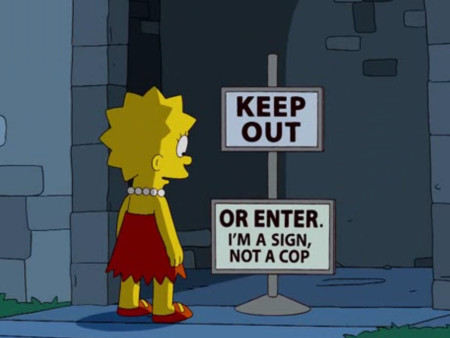

In [ ]:
# Amostra de dados (~1%)
entrada_eleicao =  spark.sparkContext.textFile('/content/drive/My Drive/boletim_urna/bweb_sample.csv')

In [ ]:
entrada_eleicao.take(10)

In [ ]:
def limpa_linha(line) :
  return line.replace('\"','')

In [ ]:
eleicao_limpa = entrada_eleicao.map(limpa_linha)

In [ ]:
eleicao_limpa.take(10)

In [ ]:
def separa_campos(line) :
  return(line.split(';'))

In [ ]:
campos_eleicao = eleicao_limpa.map(separa_campos)

In [ ]:
campos_eleicao.take(10)

In [ ]:
campos_eleicao.getNumPartitions()

In [ ]:
def filtra_governador(campos) :
  if(campos[17] == 'Governador') :
    return campos

In [ ]:
campos_filtrados = campos_eleicao.filter(filtra_governador)

In [ ]:
campos_filtrados.count()

In [ ]:
campos_filtrados.take(10)

In [ ]:
def nome_votos(campos) :
  return([campos[30], int(campos[31])])

In [ ]:
parciais = campos_filtrados.map(nome_votos)

In [ ]:
parciais.take(10)

In [ ]:
totais = parciais.reduceByKey(lambda acc,v: acc+v)

In [ ]:
totais.collect()

In [ ]:
entrada_eleicao =  spark.sparkContext.textFile('/content/drive/My Drive/boletim_urna/bweb_1t_SP_051020221321.utf8.csv.bz2')

In [ ]:
entrada_eleicao.take(10)

In [ ]:
res_map = entrada_eleicao.map(lambda line: line.replace('\"','').split(';')) \
               .filter(lambda campos: campos[17] == 'Governador') \
               .map(lambda campos: [campos[30], int(campos[31])]) \
               .reduceByKey(lambda acc,v: acc+v)

In [ ]:
res_map.collect()